In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import splitfolders
import tensorflow as tf
import os

from keras_preprocessing.image import ImageDataGenerator

In [42]:
dataset_dir = r'D:\Semester 5\Kecerdasan Buatan\Praktikum\Cat-vs-Dog\dataset\Dog and Cat .png'

In [43]:
splitfolders.ratio(dataset_dir, output="dataset-split", ratio=(0.7,0.15,0.15))

In [44]:
train_dir = r'dataset-split\train'
test_dir = r'dataset-split\test'
val_dir = r'dataset-split\val'

In [45]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,    
    )

val_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(250, 250),
    classes=['Cat','Dog'],
    class_mode='categorical',
    subset='training'
    )

val_generator =  val_datagen.flow_from_directory(
    val_dir, 
    target_size=(250,250), 
    classes=['Cat','Dog'],
    class_mode='categorical',
    )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(250,250), 
    classes=['Cat','Dog'],        
    class_mode='categorical', 
    shuffle=False
)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [55]:
img, label = val_generator.next()

labels = ['Cat','Dog']

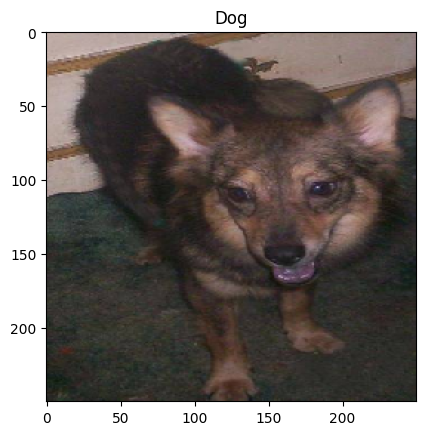

In [58]:
x = 6
plt.title(labels[tf.argmax(label[x])])
plt.imshow(img[x])

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (5,5), activation ='relu', input_shape = (250,250,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (5,5), activation ='relu'),
    tf.keras.layers.MaxPool2D((2,2), (2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(2, activation = "softmax"),
])

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 246, 246, 16)      1216      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 123, 123, 16)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 123, 123, 16)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 119, 119, 32)      12832     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 59, 59, 32)       

In [50]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5) , loss = "categorical_crossentropy", metrics=["accuracy"])

In [59]:
hasil = model.fit(
    train_generator, 
    epochs = 20,    
    validation_data=val_generator,
    )

Epoch 1/20
25/25 [==============================] - 33s 1s/step - loss: 0.6912 - accuracy: 0.5425 - val_loss: 0.6903 - val_accuracy: 0.5450
Epoch 2/20
25/25 [==============================] - 37s 1s/step - loss: 0.6799 - accuracy: 0.5713 - val_loss: 0.6860 - val_accuracy: 0.5550
Epoch 3/20
25/25 [==============================] - 32s 1s/step - loss: 0.6818 - accuracy: 0.5575 - val_loss: 0.6809 - val_accuracy: 0.5700
Epoch 4/20
25/25 [==============================] - 32s 1s/step - loss: 0.6717 - accuracy: 0.5900 - val_loss: 0.6804 - val_accuracy: 0.6000
Epoch 5/20
25/25 [==============================] - 32s 1s/step - loss: 0.6745 - accuracy: 0.5700 - val_loss: 0.6764 - val_accuracy: 0.6250
Epoch 6/20
25/25 [==============================] - 34s 1s/step - loss: 0.6697 - accuracy: 0.5850 - val_loss: 0.6815 - val_accuracy: 0.5600
Epoch 7/20
25/25 [==============================] - 36s 1s/step - loss: 0.6642 - accuracy: 0.5925 - val_loss: 0.7004 - val_accuracy: 0.5200
Epoch 8/20
25/25 [==

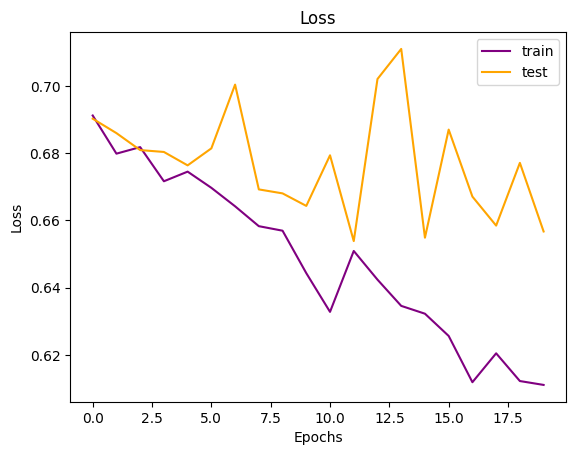

In [60]:
plt.plot(hasil.history["loss"],c = "purple")
plt.plot(hasil.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

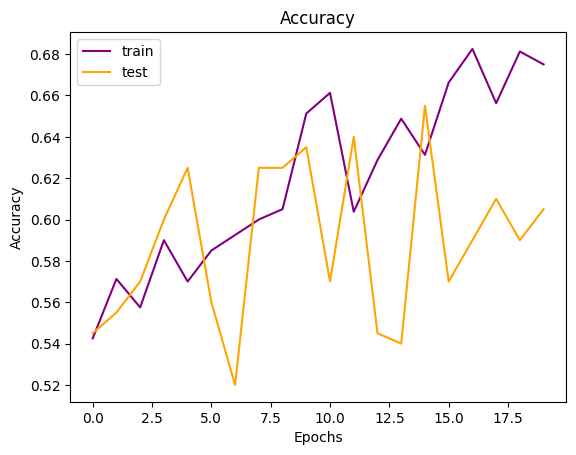

In [61]:
plt.plot(hasil.history["accuracy"],c = "purple")
plt.plot(hasil.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [62]:
print("Akurasi          :", hasil.history["accuracy"][-1] * 100, "%")
print("Akurasi validasi :", hasil.history["val_accuracy"][-1] * 100, "%")

Akurasi          : 67.5000011920929 %
Akurasi validasi : 60.50000190734863 %
